# IVDA G2

Teamname: Dicypa
Teammembers: Dionigi Rodriguez 24-755-688, Cyril Smetanka 24-754-434, Patrick Sproll 19-733-104
Github Repository: https://github.com/Di0nigi/IVDAProject.git 


## Teammembers contributions
Dionigi: Placehodler
Cyril: Placehodler
Patrick: Placeholder

## Task List for our Tool
Placeholder

***

# Data Characterization

***

## Setup

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
import re

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 50)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(" Libraries loaded successfully")

 Libraries loaded successfully


## Load Data

In [2]:
df = pd.read_csv('../data/digEds_cat.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset loaded successfully!
Shape: 351 rows × 52 columns
Memory usage: 1.02 MB


## Basic Information

In [3]:
print("="*80)
print("DATASET INFO")
print("="*80)
df.info()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   id                                               351 non-null    int64 
 1   Historical Period                                351 non-null    object
 2   Time/Century                                     351 non-null    object
 3   Edition name                                     351 non-null    object
 4   URL                                              351 non-null    object
 5   Scholarly                                        351 non-null    object
 6   Digital                                          351 non-null    object
 7   Edition                                          351 non-null    object
 8   Language                                         351 non-null    object
 9   Writing support               

## View First Rows

In [4]:
df.head()

,id,Historical Period,Time/Century,Edition name,URL,Scholarly,Digital,Edition,Language,Writing support,Begin date,End date,Manager or Editor,Institution(s),Audience,Philological statement,Account of textual variance,Value of witnesses,XML-TEI Transcription,XML(-TEI) available to download,Images,Zoom images,"Image manipulation (brightness, rotation, etc.)",Text-Image Linking,Source Text Translation,Website language,Glossary,Indices,String matching,Advanced search,Creative Commons License,Open source/Open access,Linked Open Data,API,Crowdsourcing,Feedback,Technological statement,Links to ext. resources,OCR or keyed?,Mobile friendly/application,Print-friendly view,Print facsimile (complementary output),Repository of source material(s),Place of origin of source material(s),Sponsor/Funding body,Budget (rough),Infrastructure,Current availability,RIDE review,Sahle Catalog,Citation,Handle-PID
0,1,Middle Ages,8th,Digitale Edition der Handschrift Cod. Guelf. 6...,http://diglib.hab.de/edoc/ed000006/startx.htm,yes,yes,yes,LAT,Codex,2006,2010,Torsten Schaßan,Herzog August Bibliothek Wolfenbüttel,not provided,partly,yes,yes,partly,no,partly,yes,no,no,no,GER,no,no,no,yes,no,yes,no,no,no,no,no,yes,Keyed,no,not provided,not provided,Herzog August Bibliothek Wolfenbüttel,Italy,Gerda Henkel Stiftung,not provided,XML; XSLT,yes,no,yes,not provided,21.11115/0000-000B-D080-8
1,2,Early Modern,18th,The Thomas Gray Archive,http://www.thomasgray.org/,yes,yes,no,ENG; LAT; GRE,Manuscript,2000,present,Alexander Huber,University of Oxford; SUB Göttingen,Scholars,yes,yes,yes,yes,yes,yes,no,no,no,no,ENG,yes,yes,yes,yes,no,Open Access and Open Source (all data),no,no,yes,yes,yes,yes,Keyed,no,no,no,Various,Various,Institutional funding,not provided,HTML5; CSS; jQuery; custom built,yes,no,yes,not provided,21.11115/0000-000B-D081-7
2,3,Middle Ages,14th,A critical edition of the poetry of Dafydd ap ...,http://www.dafyddapgwilym.net/,yes,yes,yes,WEL,Manuscript,2002,2007,Alexander Roberts; Dafydd Johnston,University of Swansea,Students of Celtic Studies,yes,yes,yes,yes,no,yes,yes,no,no,no,WEL; ENG,no,no,no,no,no,yes,no,no,no,yes,no,no,Keyed,no,yes,not provided,Various,"Brogynin, Penrhyn-coch",AHRC,not provided,Javascript; Perl; Xmetal; Microsoft Active Ser...,yes,no,yes,not provided,21.11115/0000-000B-D082-6
3,4,Antiquity,5th,Saint Patrick's Confessio,http://www.confessio.ie/#,yes,yes,yes,LAT,Manuscript; Print,2008,2011,Franz Fischer; Anthony Harvey,Royal Irish Academy,Scholars; general public,yes,partly,partly,yes,yes,yes,yes,no,no,ENG; GER; GLA; ITA; POR,ENG,yes,no,yes,no,yes,Open Access and Open Source (some data),no,no,no,yes,yes,yes,Keyed; OCR,no,no,yes,"Various (Dublin, Paris, Rouen, Arras, Salisbur...",Ireland,Higher Education Authority; European Regional ...,not provided,Drupal,yes,no,yes,not provided,21.11115/0000-000B-D083-5
4,5,Middle Ages; Early Modern,14th-18th,Liber Matriculae - Il libro della matricola de...,http://scrineum.unipv.it/LM/home.html,yes,yes,yes,LAT,Manuscript,2000,not provided,Antonio Olivieri,Università degli Studi di Pavia,not provided,yes,yes,yes,no,no,yes,yes,no,no,no,ITA,no,no,no,no,no,yes,no,no,no,yes,no,no,Keyed,no,not provided,not provided,Archivio Storico Comunale di Vercelli,Vercelli,not provided,not provided,not provided,no,no,yes,not provided,21.11115/0000-000B-D084-4


# Column Type Identification

In [5]:
# Function to identify column type
def identify_column_type(series):
    """Identify if column is dummy, categorical, numeric, or text"""
    
    # Remove missing values for analysis
    series_clean = series.dropna()
    unique_vals = set(series_clean.unique())
    n_unique = len(unique_vals)
    
    # Check if dummy variable (yes/no/partly/not provided)
    dummy_values = {'yes', 'no', 'partly', 'not provided', ''}
    if unique_vals.issubset(dummy_values) and n_unique > 0:
        return 'dummy'
    
    # Check if numeric
    if pd.api.types.is_numeric_dtype(series):
        return 'numeric'
    
    # Check if categorical (few unique values)
    if n_unique <= 20 and n_unique > 0:
        return 'categorical'
    
    # Check if year/date
    if series_clean.astype(str).str.match(r'^\d{4}$').any():
        return 'year/date'
    
    # Otherwise it's text
    return 'text'

print(" Function defined")

# Analyze all columns
column_analysis = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Identified_Type': [identify_column_type(df[col]) for col in df.columns],
    'Unique_Values': df.nunique(),
    'Missing_Count': df.isna().sum(),
    'Missing_Pct': (df.isna().sum() / len(df) * 100).round(1),
    'Sample_Values': [df[col].dropna().unique()[:3].tolist() if len(df[col].dropna()) > 0 else [] 
                      for col in df.columns]
})

print("\n" + "="*80)
print("COMPLETE COLUMN ANALYSIS")
print("="*80)
column_analysis

 Function defined

COMPLETE COLUMN ANALYSIS


,Column,Data_Type,Identified_Type,Unique_Values,Missing_Count,Missing_Pct,Sample_Values
id,id,int64,numeric,351,0,0.0,"[1, 2, 3]"
Historical Period,Historical Period,object,categorical,14,0,0.0,"[Middle Ages, Early Modern, Antiquity]"
Time/Century,Time/Century,object,year/date,289,0,0.0,"[8th, 18th, 14th]"
Edition name,Edition name,object,text,350,0,0.0,[Digitale Edition der Handschrift Cod. Guelf. ...
URL,URL,object,text,351,0,0.0,[http://diglib.hab.de/edoc/ed000006/startx.htm...
Scholarly,Scholarly,object,dummy,2,0,0.0,"[yes, no]"
Digital,Digital,object,dummy,2,0,0.0,"[yes, no]"
Edition,Edition,object,dummy,3,0,0.0,"[yes, no, not provided]"
Language,Language,object,text,78,0,0.0,"[LAT, ENG; LAT; GRE, WEL]"
Writing support,Writing support,object,text,92,0,0.0,"[Codex, Manuscript, Manuscript; Print]"


# Summary by Type


Columns by Identified Type:
Identified_Type
dummy          25
text           15
categorical     8
year/date       3
numeric         1
Name: count, dtype: int64


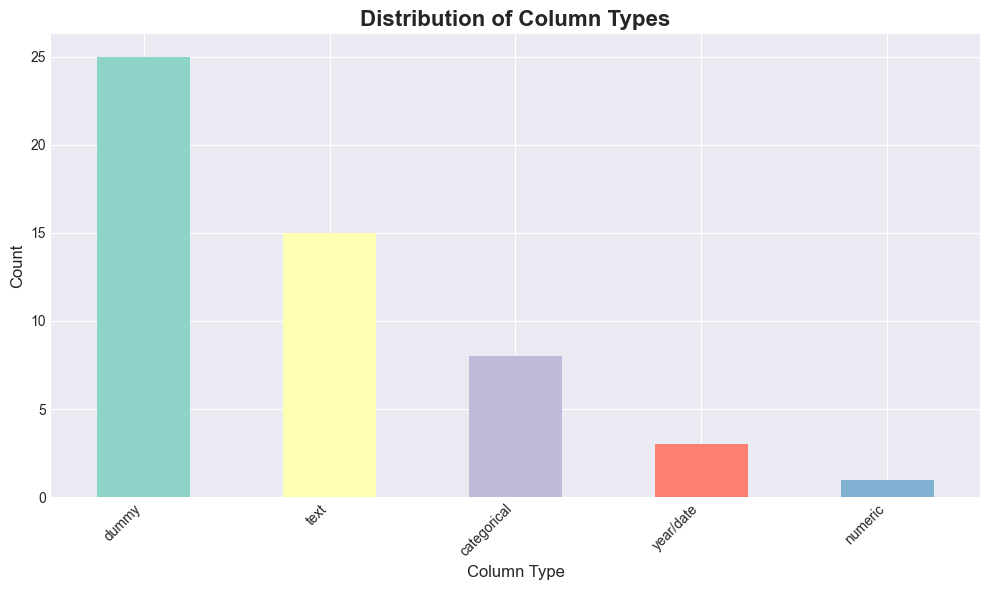

In [6]:
# Summary by type
print("\nColumns by Identified Type:")
print("="*80)
type_summary = column_analysis['Identified_Type'].value_counts()
print(type_summary)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.Set3(range(len(type_summary)))
type_summary.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Distribution of Column Types', fontsize=16, fontweight='bold')
ax.set_xlabel('Column Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Get all dummy variables

In [7]:
dummy_cols = column_analysis[column_analysis['Identified_Type'] == 'dummy']['Column'].tolist()

print(f"Found {len(dummy_cols)} dummy variables:")
print("="*80)
for col in dummy_cols:
    print(f"  • {col}")

Found 25 dummy variables:
  • Scholarly
  • Digital
  • Edition
  • Philological statement
  • Account of textual variance
  • XML-TEI Transcription
  • XML(-TEI) available to download
  • Images
  • Zoom images
  • Image manipulation (brightness, rotation, etc.)
  • Text-Image Linking
  • Glossary
  • Indices
  • String matching
  • Advanced search
  • Creative Commons License
  • Linked Open Data
  • API
  • Crowdsourcing
  • Feedback
  • Technological statement
  • Links to ext. resources
  • Mobile friendly/application
  • Current availability
  • Citation



Dummy Variable Distributions:

Scholarly:
------------------------------------------------------------
Scholarly
yes    316
no      35
Name: count, dtype: int64

Percentages:
Scholarly
yes    90.0
no     10.0
Name: count, dtype: float64

Digital:
------------------------------------------------------------
Digital
yes    337
no      14
Name: count, dtype: int64

Percentages:
Digital
yes    96.0
no      4.0
Name: count, dtype: float64

Edition:
------------------------------------------------------------
Edition
yes             310
no               40
not provided      1
Name: count, dtype: int64

Percentages:
Edition
yes             88.3
no              11.4
not provided     0.3
Name: count, dtype: float64

Philological statement:
------------------------------------------------------------
Philological statement
yes             203
partly          138
no                7
not provided      3
Name: count, dtype: int64

Percentages:
Philological statement
yes             57.8
partly    

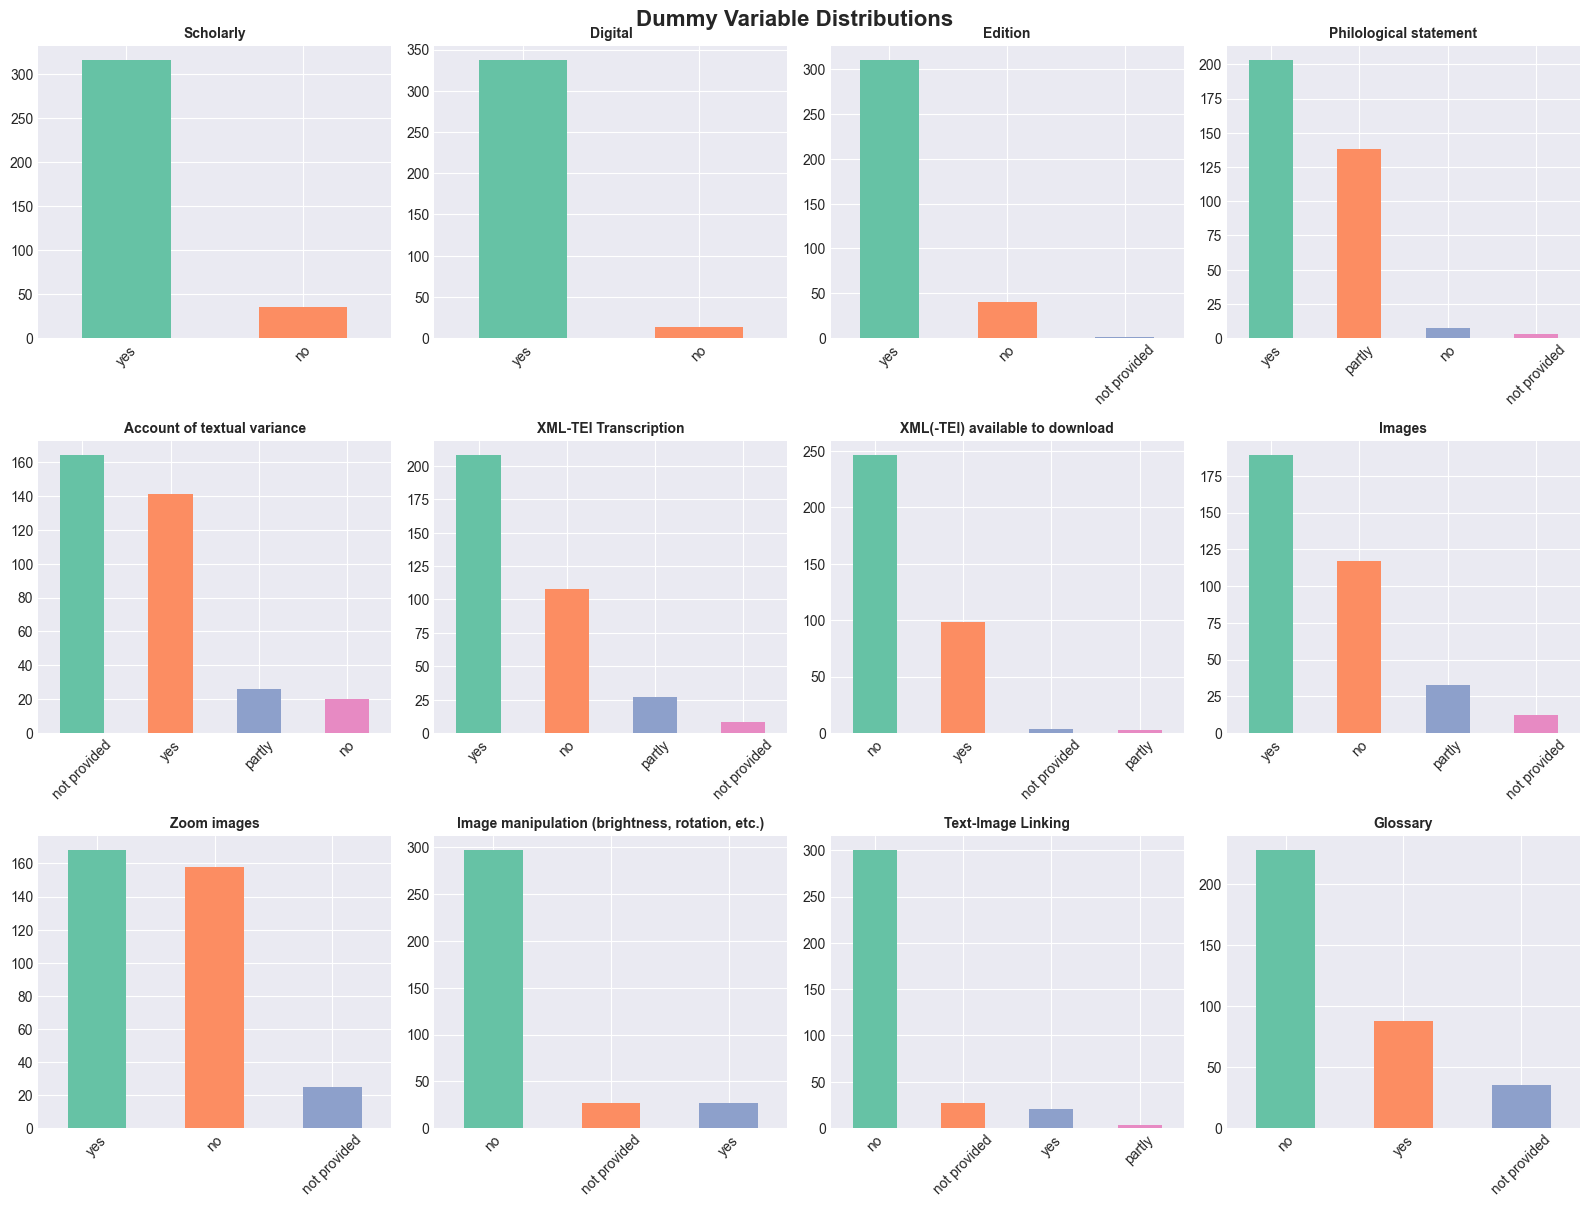

In [8]:
print("\nDummy Variable Distributions:")
print("="*80)

for col in dummy_cols:
    print(f"\n{col}:")
    print("-" * 60)
    counts = df[col].value_counts()
    print(counts)
    print(f"\nPercentages:")
    print((counts / len(df) * 100).round(1))
    
# Visualize dummy variables (first 12)
if len(dummy_cols) > 0:
    n_plots = min(12, len(dummy_cols))
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(dummy_cols[:n_plots]):
        value_counts = df[col].value_counts()
        colors = plt.cm.Set2(range(len(value_counts)))
        value_counts.plot(kind='bar', ax=axes[i], color=colors)
        axes[i].set_title(col, fontsize=10, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for i in range(n_plots, 12):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Dummy Variable Distributions', fontsize=16, fontweight='bold', y=1.002)
    plt.show()

Found 8 categorical variables:
  • Historical Period (14 unique values)
  • Value of witnesses (5 unique values)
  • Open source/Open access (6 unique values)
  • OCR or keyed? (6 unique values)
  • Print-friendly view (6 unique values)
  • Print facsimile (complementary output) (5 unique values)
  • RIDE review (10 unique values)
  • Sahle Catalog (6 unique values)

Historical Period
Historical Period
Middle Ages                                                    81
Long Nineteenth Century                                        74
Early Modern                                                   70
Antiquity                                                      41
Modern                                                         26
Long Nineteenth Century; Modern                                23
Early Modern; Long Nineteenth Century                          17
Middle Ages; Early Modern                                       6
Antiquity; Middle Ages                                          4


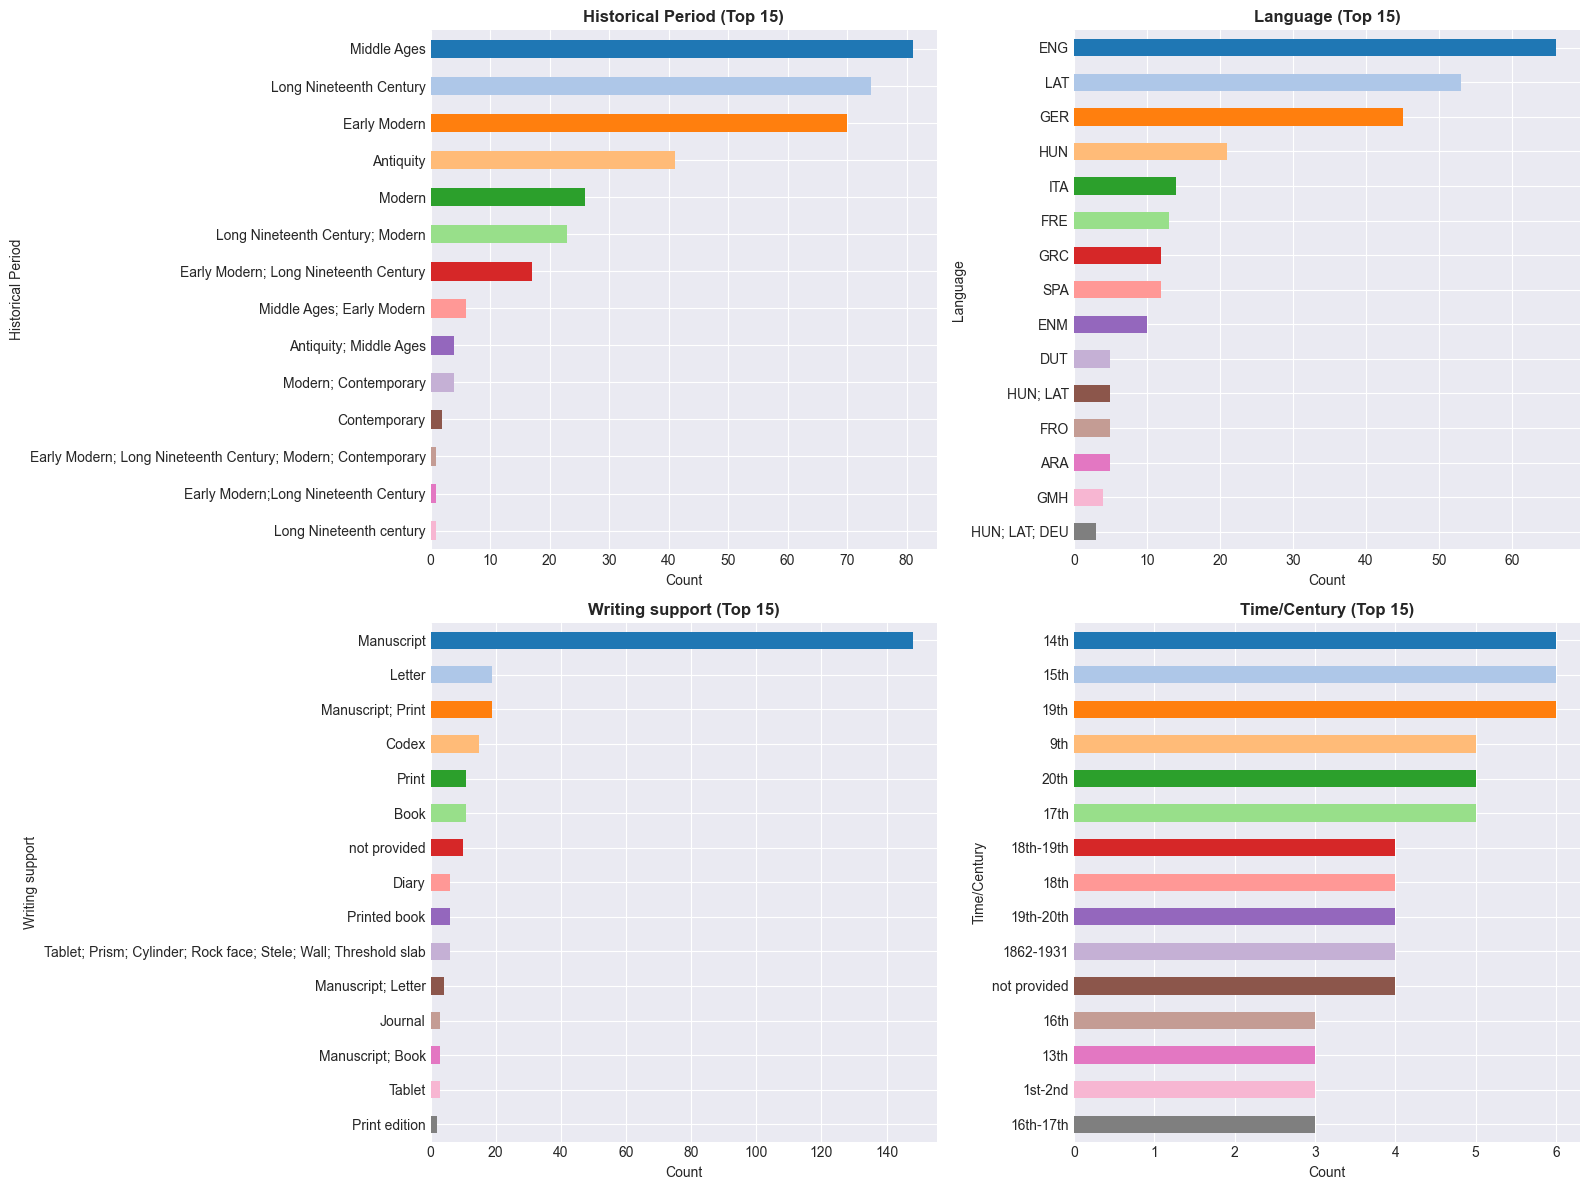

In [9]:

cat_cols = column_analysis[column_analysis['Identified_Type'] == 'categorical']['Column'].tolist()

print(f"Found {len(cat_cols)} categorical variables:")
print("="*80)
for col in cat_cols:
    n_unique = df[col].nunique()
    print(f"  • {col} ({n_unique} unique values)")
    
# Detailed analysis of key categorical variables
key_categoricals = ['Historical Period', 'Language', 'Writing support', 'Time/Century']
available_cats = [col for col in key_categoricals if col in cat_cols or col in df.columns]

for col in available_cats:
    if col in df.columns:
        print(f"\n{'='*80}")
        print(f"{col}")
        print(f"{'='*80}")
        counts = df[col].value_counts()
        print(counts)
        print(f"\nTop 5 as percentages:")
        print((counts.head() / len(df) * 100).round(1))
        
# Visualize categorical distributions
if len(available_cats) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(available_cats[:4]):
        if col in df.columns:
            top_n = df[col].value_counts().head(15)
            colors = plt.cm.tab20(range(len(top_n)))
            top_n.plot(kind='barh', ax=axes[i], color=colors)
            axes[i].set_title(f'{col} (Top 15)', fontsize=12, fontweight='bold')
            axes[i].set_xlabel('Count')
            axes[i].invert_yaxis()
    
    # Hide empty subplots
    for i in range(len(available_cats), 4):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

## Get all text variables

In [10]:
text_cols = column_analysis[column_analysis['Identified_Type'] == 'text']['Column'].tolist()

print(f"Found {len(text_cols)} text/string variables:")
print("="*80)
for col in text_cols:
    n_unique = df[col].nunique()
    avg_length = df[col].dropna().astype(str).str.len().mean()
    print(f"  • {col}")
    print(f"    - {n_unique} unique values")
    print(f"    - Average length: {avg_length:.1f} characters")
    print()

Found 15 text/string variables:
  • Edition name
    - 350 unique values
    - Average length: 38.6 characters

  • URL
    - 351 unique values
    - Average length: 40.6 characters

  • Language
    - 78 unique values
    - Average length: 5.2 characters

  • Writing support
    - 92 unique values
    - Average length: 14.3 characters

  • Manager or Editor
    - 284 unique values
    - Average length: 20.4 characters

  • Institution(s)
    - 224 unique values
    - Average length: 50.5 characters

  • Audience
    - 59 unique values
    - Average length: 21.4 characters

  • Source Text Translation
    - 21 unique values
    - Average length: 3.9 characters

  • Website language
    - 45 unique values
    - Average length: 4.0 characters

  • Repository of source material(s)
    - 166 unique values
    - Average length: 37.4 characters

  • Place of origin of source material(s)
    - 122 unique values
    - Average length: 12.2 characters

  • Sponsor/Funding body
    - 137 unique v

## Overall missing data statistics

MISSING DATA SUMMARY
Total cells: 18,252
Total missing: 8
Overall missing: 0.04%

Columns with no missing data: 49
Columns with some missing data: 3
Columns with >50% missing: 0

Top 20 Columns by Missing Data:


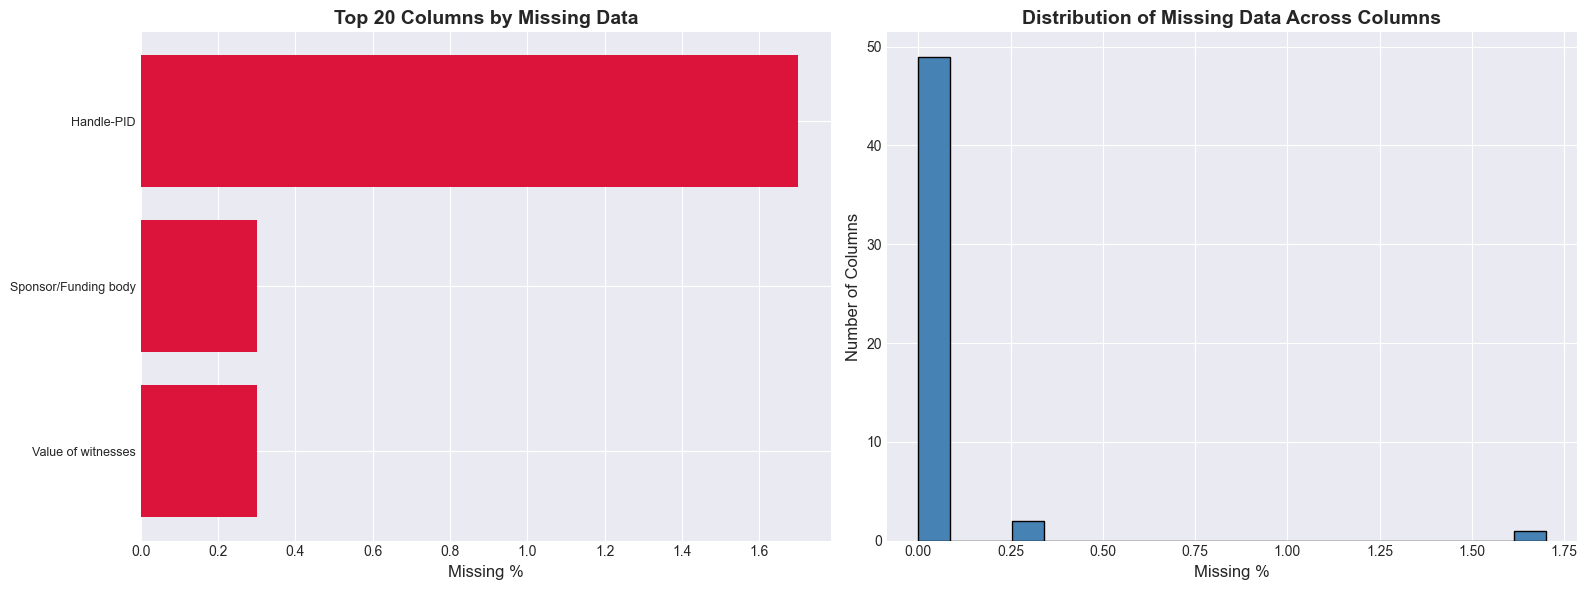

In [11]:
total_cells = df.shape[0] * df.shape[1]
total_missing = df.isna().sum().sum()
missing_pct = (total_missing / total_cells * 100)

print("="*80)
print("MISSING DATA SUMMARY")
print("="*80)
print(f"Total cells: {total_cells:,}")
print(f"Total missing: {total_missing:,}")
print(f"Overall missing: {missing_pct:.2f}%")
print(f"\nColumns with no missing data: {(df.isna().sum() == 0).sum()}")
print(f"Columns with some missing data: {(df.isna().sum() > 0).sum()}")
print(f"Columns with >50% missing: {(df.isna().sum() / len(df) > 0.5).sum()}")

# Columns sorted by missing data
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isna().sum(),
    'Missing_Pct': (df.isna().sum() / len(df) * 100).round(1)
}).sort_values('Missing_Pct', ascending=False)

print("\nTop 20 Columns by Missing Data:")
print("="*80)
missing_data.head(20)

# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 20 columns with most missing data
top_missing = missing_data[missing_data['Missing_Pct'] > 0].head(20)
axes[0].barh(range(len(top_missing)), top_missing['Missing_Pct'], color='crimson')
axes[0].set_yticks(range(len(top_missing)))
axes[0].set_yticklabels(top_missing['Column'], fontsize=9)
axes[0].set_xlabel('Missing %', fontsize=12)
axes[0].set_title('Top 20 Columns by Missing Data', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Distribution of missing percentages
axes[1].hist(missing_data['Missing_Pct'], bins=20, color='steelblue', edgecolor='black')
axes[1].set_xlabel('Missing %', fontsize=12)
axes[1].set_ylabel('Number of Columns', fontsize=12)
axes[1].set_title('Distribution of Missing Data Across Columns', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Historical Period Distribution:
Historical Period
Middle Ages                                                    81
Long Nineteenth Century                                        74
Early Modern                                                   70
Antiquity                                                      41
Modern                                                         26
Long Nineteenth Century; Modern                                23
Early Modern; Long Nineteenth Century                          17
Middle Ages; Early Modern                                       6
Antiquity; Middle Ages                                          4
Modern; Contemporary                                            4
Contemporary                                                    2
Early Modern; Long Nineteenth Century; Modern; Contemporary     1
Early Modern;Long Nineteenth Century                            1
Long Nineteenth century                                         1
Name: count, dtype: int64


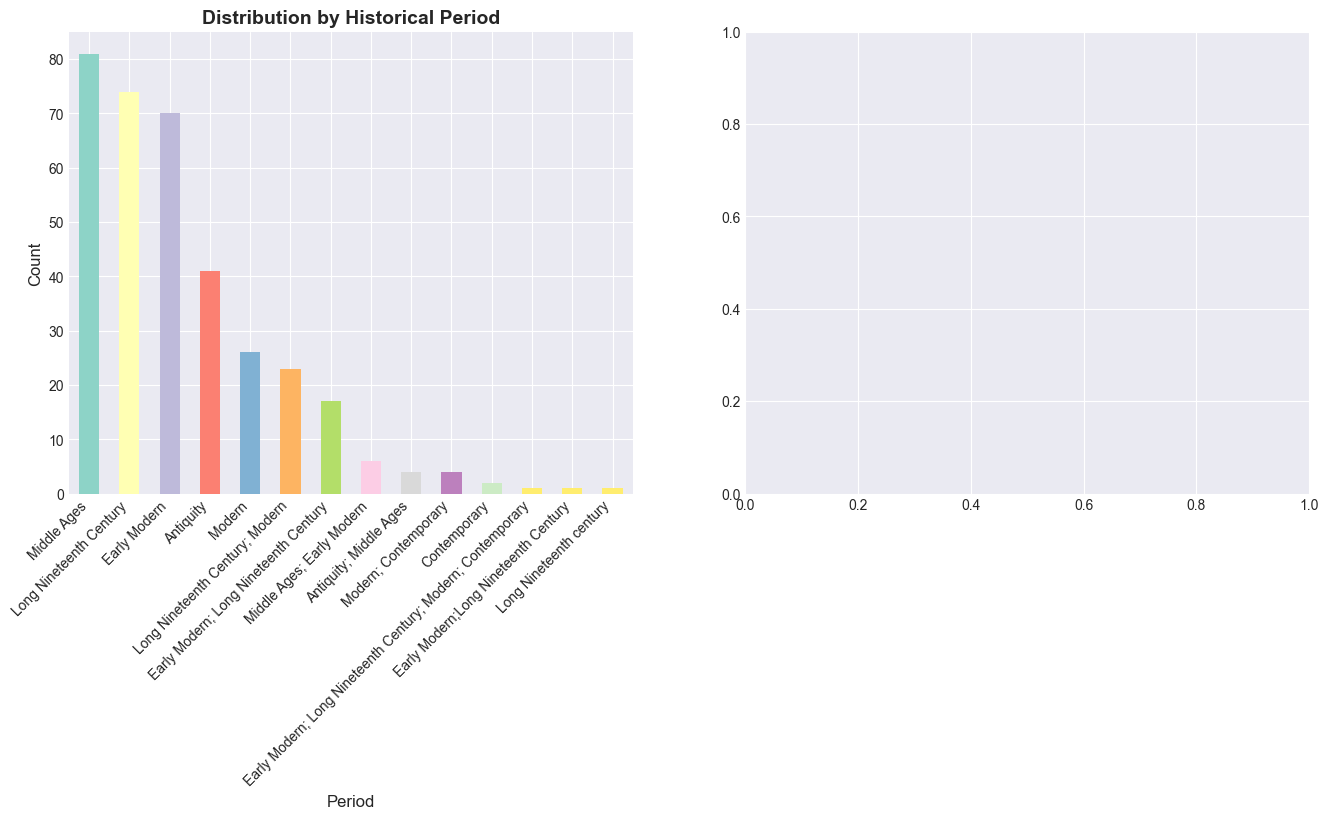

In [12]:
if 'Historical Period' in df.columns:
    print("Historical Period Distribution:")
    print("="*80)
    period_counts = df['Historical Period'].value_counts()
    print(period_counts)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart
    colors = plt.cm.Set3(range(len(period_counts)))
    period_counts.plot(kind='bar', ax=axes[0], color=colors)
    axes[0].set_title('Distribution by Historical Period', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Period', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45, labelsize=10)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
    

Language Distribution (Top 20):
LAT    88
ENG    88
GER    67
HUN    35
FRE    27
ITA    24
GRC    22
SPA    21
ENM    11
POL     8
ARA     8
HEB     7
DUT     7
FRO     5
GMH     4
DEU     4
ANG     3
FRA     3
ARC     3
DAN     3
Name: count, dtype: int64


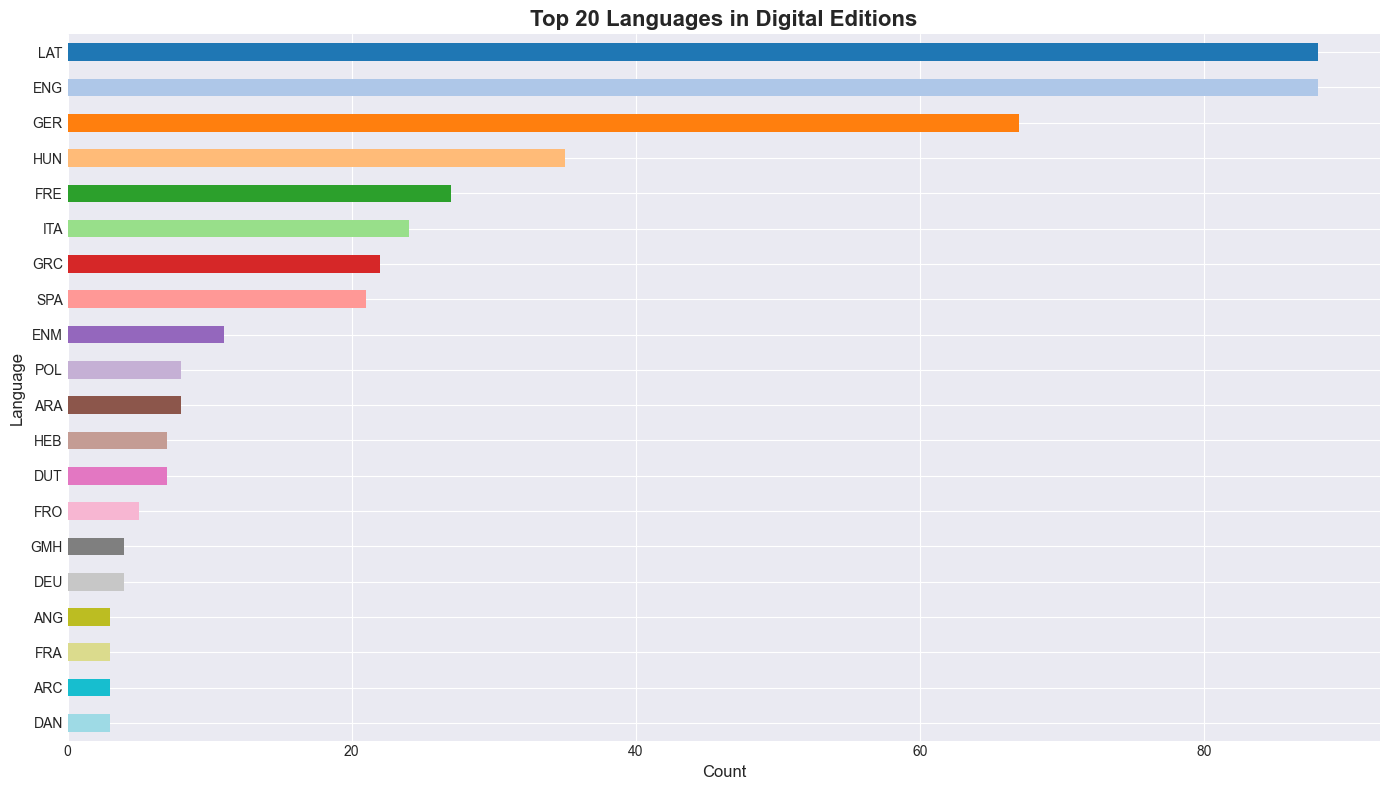

In [13]:
if 'Language' in df.columns:
    print("Language Distribution (Top 20):")
    print("="*80)
    
    # Handle multiple languages (some entries may have multiple languages)
    all_languages = []
    for lang in df['Language'].dropna():
        # Split by semicolon or comma
        langs = str(lang).replace(';', ',').split(',')
        all_languages.extend([l.strip() for l in langs])
    
    lang_counts = pd.Series(all_languages).value_counts()
    print(lang_counts.head(20))
    
    plt.figure(figsize=(14, 8))
    colors = plt.cm.tab20(range(len(lang_counts.head(20))))
    lang_counts.head(20).plot(kind='barh', color=colors)
    plt.title('Top 20 Languages in Digital Editions', fontsize=16, fontweight='bold')
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Language', fontsize=12)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## Key technical features

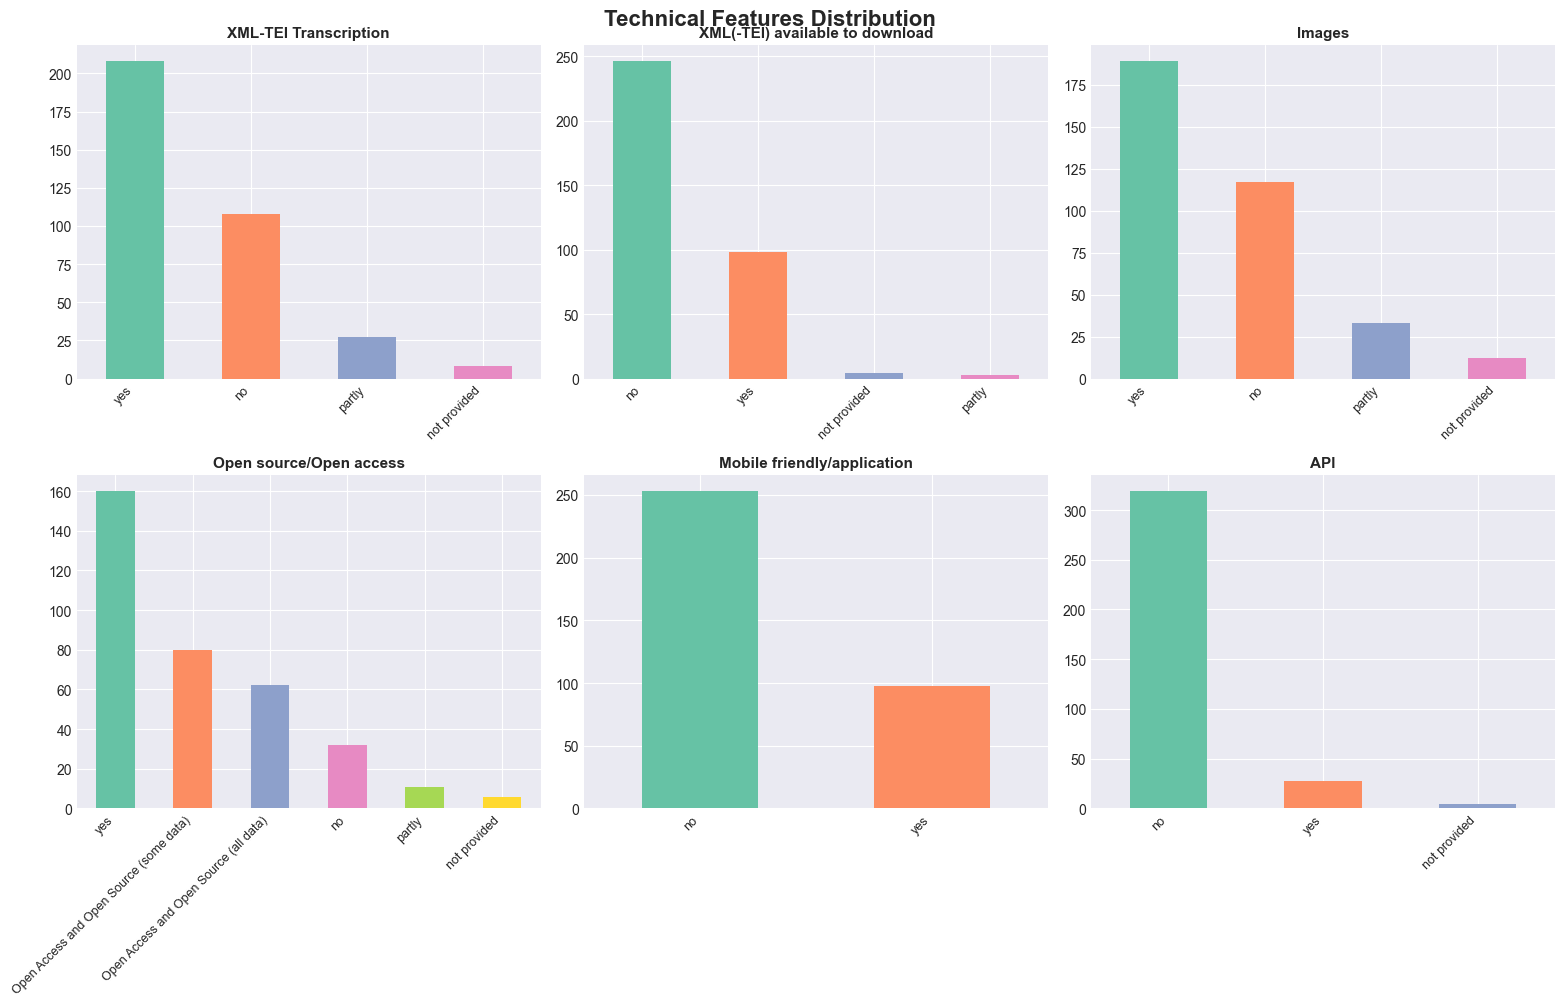

In [14]:

tech_features = [
    'XML-TEI Transcription',
    'XML(-TEI) available to download',
    'Images',
    'Open source/Open access',
    'Mobile friendly/application',
    'API'
]

available_tech = [col for col in tech_features if col in df.columns]

if len(available_tech) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(available_tech[:6]):
        counts = df[col].value_counts()
        colors = plt.cm.Set2(range(len(counts)))
        counts.plot(kind='bar', ax=axes[i], color=colors)
        axes[i].set_title(col, fontsize=11, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45, labelsize=9)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), ha='right')
    
    # Hide empty subplots
    for i in range(len(available_tech), 6):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Technical Features Distribution', fontsize=16, fontweight='bold', y=1.002)
    plt.show()

In [15]:
# Export column analysis
column_analysis.to_csv('column_analysis_summary.csv', index=False)
print(" Saved: column_analysis_summary.csv")

# Export missing data analysis
missing_data.to_csv('missing_data_analysis.csv', index=False)
print(" Saved: missing_data_analysis.csv")

# Create a summary report
with open('dataset_summary_report.txt', 'w', encoding='utf-8') as f:
    f.write("DIGITAL EDITIONS DATASET - SUMMARY REPORT\n")
    f.write("="*80 + "\n\n")
    
    f.write(f"Total Editions: {len(df)}\n")
    f.write(f"Total Columns: {len(df.columns)}\n\n")
    
    f.write("Column Types:\n")
    f.write("-"*40 + "\n")
    for ctype, count in column_analysis['Identified_Type'].value_counts().items():
        f.write(f"  {ctype}: {count}\n")
    
    f.write("\nDummy Variables:\n")
    f.write("-"*40 + "\n")
    for col in dummy_cols:
        f.write(f"  • {col}\n")
    
    f.write("\nMissing Data:\n")
    f.write("-"*40 + "\n")
    f.write(f"  Overall: {missing_pct:.2f}%\n")
    f.write(f"  Columns with >50% missing: {(df.isna().sum() / len(df) > 0.5).sum()}\n")

print(" Saved: dataset_summary_report.txt")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

 Saved: column_analysis_summary.csv
 Saved: missing_data_analysis.csv
 Saved: dataset_summary_report.txt

ANALYSIS COMPLETE!


***
# Data Cleaning & Preprocessing

***

We will not really need to do a lot of data cleaning for this dataset as it is already quite clean and well curated thanks to Greta Franzini's initial work. The "not provided" values in the text columns do not require additional handling, as this is a meaningful feature of the underlying textcollection, where e.g. the timeframe is impossible to state with clear precision. We will

- Handle the few missing values by setting them to "not provided"
- Encode dummy and categorical variables to a numeric format suitable for modeling and filtering
- Recode the Time/century variable into a more usable format

## Handle missing values

In [16]:
cols_to_fill = ['Handle-PID', 'Value of witnesses', 'Sponsor/Funding body']

for col in cols_to_fill:
    if col in df.columns:
        df[col].fillna('not provided', inplace=True)

## Recode dummy and categorical variables

In [17]:
# Recode dummy and categorical columns into binary indicators
# Uses existing variables: df, dummy_cols, cat_cols
cols = list(dict.fromkeys((dummy_cols or []) + (cat_cols or [])))  # preserve order, safe if lists exist
cols = [c for c in cols if c in df.columns and c != 'Time/Century']

created = []

for col in cols:
    # get non-null unique values
    non_null = df[col].dropna()
    unique_vals = pd.unique(non_null)
    # normalized lowercase set for yes/no detection
    norm = {str(v).strip().lower() for v in unique_vals if str(v).strip() != ''}
    
    # If column only contains yes/no => single binary column
    if len(norm) > 0 and norm.issubset({'yes', 'no'}):
        new_name = f"{col}_bin"
        df[new_name] = df[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
        # keep nullable integer to preserve missing values
        df[new_name] = df[new_name].astype('Int64')
        created.append(new_name)
    else:
        # One column per distinct option (ignore empty strings / NaN)
        # Special-case: if values are exactly yes/no/not provided -> create two columns:
        #  - <col>_bin : 1 for yes, 0 for no or 'not provided' (preserve real NaN as <NA>)
        #  - <col>_not_provided : 1 when value == 'not provided' (preserve real NaN as <NA>)
        if norm.issubset({'yes', 'no', 'not provided'}) and {'yes', 'no', 'not provided'}.issuperset(norm):
            s = df[col]
            # yes/no binary (treat 'not provided' as 0, keep true NaN as <NA>)
            new_name = f"{col}_bin"
            base = new_name
            safe = ''.join(ch if ch.isalnum() else '_' for ch in base).strip('_')
            yes_no = pd.Series(0, index=df.index, dtype='Int64')
            mask_yes = s.fillna('').astype(str).str.strip().str.lower() == 'yes'
            yes_no[mask_yes] = 1
            yes_no[s.isna()] = pd.NA
            df[safe] = yes_no
            created.append(safe)

            # not provided indicator
            base2 = f"{col}_not provided"
            safe2 = ''.join(ch if ch.isalnum() else '_' for ch in base2).strip('_')
            notprov = pd.Series(0, index=df.index, dtype='Int64')
            mask_notprov = s.fillna('').astype(str).str.strip().str.lower() == 'not provided'
            notprov[mask_notprov] = 1
            notprov[s.isna()] = pd.NA
            df[safe2] = notprov
            created.append(safe2)
            continue
        for val in sorted(unique_vals, key=lambda x: str(x)):
            if pd.isna(val):
                continue
            sval = str(val).strip()
            if sval == "":
                continue
            # sanitize column name (alphanumeric + underscores)
            base = f"{col}_{sval}"
            safe = ''.join(ch if ch.isalnum() else '_' for ch in base).strip('_')
            # create indicator (1 if exact match to the string value)
            df[safe] = (df[col].astype(str).fillna('').str.strip() == sval).astype('Int64')
            created.append(safe)

print(f"Re-encoded {len(cols)} columns -> created {len(created)} new columns.")
print("Sample of new columns:", created[:40])

# Historical period can just be a single numeric column, I think
# Preserve original and create categorical codes (order of appearance)
s = df['Historical Period'].where(df['Historical Period'].notna(), pd.NA).astype('object')
cat = s.astype('category')
df['Historical_Period_code'] = pd.Series(cat.cat.codes, index=df.index).replace(-1, pd.NA).astype('Int64')

# Create mapping dict (category -> code)
hist_period_mapping = {cat: code for code, cat in enumerate(cat.cat.categories)}

print(f"Created 'Historical_Period_code' with {len(hist_period_mapping)} unique codes.")
print("Sample mapping (first 10):", dict(list(hist_period_mapping.items())[:10]))



Re-encoded 33 columns -> created 124 new columns.
Sample of new columns: ['Scholarly_bin', 'Digital_bin', 'Edition_bin', 'Edition_not_provided', 'Philological_statement_no', 'Philological_statement_not_provided', 'Philological_statement_partly', 'Philological_statement_yes', 'Account_of_textual_variance_no', 'Account_of_textual_variance_not_provided', 'Account_of_textual_variance_partly', 'Account_of_textual_variance_yes', 'XML_TEI_Transcription_no', 'XML_TEI_Transcription_not_provided', 'XML_TEI_Transcription_partly', 'XML_TEI_Transcription_yes', 'XML__TEI__available_to_download_no', 'XML__TEI__available_to_download_not_provided', 'XML__TEI__available_to_download_partly', 'XML__TEI__available_to_download_yes', 'Images_no', 'Images_not_provided', 'Images_partly', 'Images_yes', 'Zoom_images_bin', 'Zoom_images_not_provided', 'Image_manipulation__brightness__rotation__etc___bin', 'Image_manipulation__brightness__rotation__etc___not_provided', 'Text_Image_Linking_no', 'Text_Image_Linking_n

## Recode Time/Century variable and historical period

In [18]:

def century_to_years(century_num, is_bc=False):
    """Convert century number to start/end years."""
    if is_bc:
        # BC centuries: 6th BC is -600 to -501
        start = -(century_num * 100)
        end = -(century_num * 100 - 99)
    else:
        start = (century_num - 1) * 100 + 1
        end = century_num * 100
    return start, end

def parse_time_period(time_str):
    """Parse various time period formats into start and end years."""
    if pd.isna(time_str) or time_str == 'not provided':
        return np.nan, np.nan
    
    time_str = str(time_str).strip()
    
    # Handle "Mid" prefix (e.g., "Mid 4th")
    if time_str.startswith('Mid '):
        match = re.search(r'Mid (\d+)(?:th|st|nd|rd)', time_str, re.IGNORECASE)
        if match:
            century = int(match.group(1))
            if 'BC' in time_str:
                start, end = century_to_years(century, is_bc=True)
                mid = (start + end) // 2
                return mid, mid
            else:
                start, end = century_to_years(century)
                mid = (start + end) // 2
                return mid, mid
    
    # Handle "pre-" prefix (e.g., "pre-1920", "pre-AD 900")
    if time_str.startswith('pre-'):
        match = re.search(r'pre-(?:AD )?(\d+)', time_str)
        if match:
            year = int(match.group(1))
            return np.nan, year
    
    # Simple year ranges (e.g., "1773-1836", "1500-1918")
    match = re.match(r'^(\d{3,4})-(\d{3,4})$', time_str)
    if match:
        return int(match.group(1)), int(match.group(2))
    
    # Multiple years separated by semicolons (e.g., "1563; 1570; 1576; 1583")
    if ';' in time_str:
        years = [int(y.strip()) for y in re.findall(r'\d{3,4}', time_str)]
        if years:
            return min(years), max(years)
    
    # BC year ranges (e.g., "744 BC-669 BC", "700 BC-500 AD")
    bc_ad_match = re.match(r'^(\d+)\s*BC-(\d+)\s*(BC|AD)$', time_str)
    if bc_ad_match:
        start_year = int(bc_ad_match.group(1))
        end_year = int(bc_ad_match.group(2))
        end_bc_ad = bc_ad_match.group(3)
        
        start = -start_year
        end = -end_year if end_bc_ad == 'BC' else end_year
        return start, end
    
    # BC to AD ranges (e.g., "6th BC-4th AD", "1st BC-4th AD")
    bc_ad_century_match = re.match(r'^(\d+)(?:st|nd|rd|th)\s*BC-(\d+)(?:st|nd|rd|th)\s*AD$', time_str)
    if bc_ad_century_match:
        bc_century = int(bc_ad_century_match.group(1))
        ad_century = int(bc_ad_century_match.group(2))
        
        bc_start, bc_end = century_to_years(bc_century, is_bc=True)
        ad_start, ad_end = century_to_years(ad_century, is_bc=False)
        
        return bc_start, ad_end
    
    # Simple BC years (e.g., "180 BC")
    bc_year_match = re.match(r'^(\d+)\s*BC$', time_str)
    if bc_year_match:
        year = int(bc_year_match.group(1))
        return -year, -year
    
    # BC century ranges (e.g., "3rd BC-1st AD")
    bc_century_match = re.match(r'^(\d+)(?:st|nd|rd|th)\s*BC$', time_str)
    if bc_century_match:
        century = int(bc_century_match.group(1))
        start, end = century_to_years(century, is_bc=True)
        return start, end
    
    # Century ranges (e.g., "14th-18th", "4th-15th", "10th-17th")
    century_range_match = re.match(r'^(\d+)(?:st|nd|rd|th)-(\d+)(?:st|nd|rd|th)$', time_str)
    if century_range_match:
        start_century = int(century_range_match.group(1))
        end_century = int(century_range_match.group(2))
        
        start, _ = century_to_years(start_century)
        _, end = century_to_years(end_century)
        return start, end
    
    # Single century (e.g., "17th", "10th", "15th")
    single_century_match = re.match(r'^(\d+)(?:st|nd|rd|th)$', time_str)
    if single_century_match:
        century = int(single_century_match.group(1))
        start, end = century_to_years(century)
        return start, end
    
    # Single year (e.g., "1776", "1898")
    single_year_match = re.match(r'^(\d{3,4})$', time_str)
    if single_year_match:
        year = int(single_year_match.group(1))
        return year, year
    
    # Decade ranges (e.g., "1740s-1770s", "1770s-1880s")
    decade_range_match = re.match(r'^(\d{3})0s-(\d{3})0s$', time_str)
    if decade_range_match:
        start_decade = int(decade_range_match.group(1)) * 10
        end_decade = int(decade_range_match.group(2)) * 10 + 9
        return start_decade, end_decade
    
    # Negative years (e.g., "-0014-1200", "-0500-1300")
    negative_match = re.match(r'^-(\d+)-(\d+)$', time_str)
    if negative_match:
        start = -int(negative_match.group(1))
        end = int(negative_match.group(2))
        return start, end
    
    # Slash notation (e.g., "16/17" meaning 16th-17th century)
    slash_match = re.match(r'^(\d+)/(\d+)$', time_str)
    if slash_match:
        start_century = int(slash_match.group(1))
        end_century = int(slash_match.group(2))
        start, _ = century_to_years(start_century)
        _, end = century_to_years(end_century)
        return start, end
    
    # If nothing matches, return NaN
    return np.nan, np.nan

# Apply the function to create new columns
df[['period_start', 'period_end']] = df['Time/Century'].apply(
    lambda x: pd.Series(parse_time_period(x))
)

# Convert to integer type (nullable integer to handle NaN)
df['period_start'] = df['period_start'].astype('Int64')
df['period_end'] = df['period_end'].astype('Int64')

# Display results
print(df[['Time/Century', 'period_start', 'period_end']].head(50))
print("\n" + "="*80 + "\n")
print(f"Total rows: {len(df)}")
print(f"Rows with valid parsing: {df['period_start'].notna().sum()}")
print(f"Rows that couldn't be parsed: {df['period_start'].isna().sum()}")

     Time/Century  period_start  period_end
0             8th           701         800
1            18th          1701        1800
2            14th          1301        1400
3             5th           401         500
4       14th-18th          1301        1800
5       1662-1686          1662        1686
6         1st-2nd             1         200
7         1st-2nd             1         200
8            1776          1776        1776
9         Mid 4th           350         350
10    1740s-1770s          1740        1779
11         1st BC          -100          -1
12      10th-11th           901        1100
13           1195          1195        1195
14            9th           801         900
15    1920s-1960s          1920        1969
16       4th-15th           301        1500
17           1225          1225        1225
18           12th          1101        1200
19      1216-1272          1216        1272
20           18th          1701        1800
21      1749-1750          1749 

In [19]:
# merge in data by Gemini (Author, description and philosophical/artistic direction)
gemini_df = pd.read_csv('../data/gemini_ivda.csv')

# drop the 'Edition name' column and rename the others
gemini_df = gemini_df.drop(columns=['Edition name'])
gemini_df = gemini_df.rename(columns={
    'Author Name (of Original Work)': 'author',
    'Philosophical/Artistic Direction': 'phil_direction',
    'Content Description': 'description'
})

# merge with the existing df
df = df.merge(gemini_df, on='id', how='left')

In [22]:
# add keywords column
keywords_df = pd.read_csv('../data/keywords_ivda.csv')
# keep only id and keywords columns. rename 'Keywords (5 per row)' to 'keywords'
keywords_df = keywords_df[['id', 'Keywords (5 per row)']].rename(columns={'Keywords (5 per row)': 'keywords'})
# merge with existing df
df = df.merge(keywords_df, on='id', how='left')

In [23]:
# save the dataset
processed_data = '../data/processed_data.csv'
df.to_csv(processed_data, index=False, encoding='utf-8')
print(f"Saved: {processed_data} ({df.shape[0]} rows × {df.shape[1]} columns)")


Saved: ../data/processed_data.csv (351 rows × 183 columns)
